In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
timed_df = pd.read_csv("close_dupli.csv")
timed_df.fillna(0, inplace=True)

timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [5]:
timed_df

,ABB,AEGISLOG,AMARAJABAT,AMBALALSA,ANDHRAPET,ANSALAPI,ARUNAHTEL,BOMDYEING,ASIANHOTNR,ATUL,...,BENGALASM,SUNDARAM,TAMBOLI,KCPSUGIND,KECL,KTIL,ZENTEC,APLAPOLLO,TERASOFT,STEELXIND
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,53.989998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.839999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-04,52.599998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.579999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-05,52.200001,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.799999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-06,56.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.189999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-07,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.299999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,4132.799805,326.799988,644.150024,40.500000,77.339996,0.0,15.870000,145.449997,139.600006,7027.399902,...,5626.049805,3.44,170.050003,35.900002,126.050003,55.049999,728.250000,1617.050049,46.310001,8.80
2023-10-09,4095.149902,322.700012,634.549988,41.310001,74.269997,14.3,14.930000,141.300003,129.649994,6889.799805,...,5610.049805,3.36,168.300003,36.660000,127.150002,55.000000,709.450012,1572.150024,44.180000,7.98
2023-10-10,4189.149902,323.299988,635.250000,42.130001,74.580002,0.0,15.000000,149.949997,133.500000,6882.899902,...,5645.899902,3.34,178.000000,38.480000,130.899994,52.730000,744.900024,1615.250000,47.060001,8.49


In [6]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2010-01-05'
end_date = '2019-01-05'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 100 #Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

#random num columns
timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.columns

Index(['CEENIK', 'BEL', 'SAIL', 'INDXTRA', 'MAHLIFE', 'MANGCHEFER', 'PETRONET',
       'CENTURYTEX', 'COMFINTE', 'TELECANOR', 'ISMTLTD', 'LXMIATO',
       'VINATIORGA', 'ROHLTD', 'VIPULORG', 'SHAMROIN', 'LEADFIN', 'POLYMED',
       'ASMTEC', 'KAMATHOTEL', 'KMCSHIL', 'SUPERHOUSE', 'SHALPRO',
       'NEULANDLAB', 'LUHARUKA', 'TIMKEN', 'INTEGRAEN', 'CIPLA', 'HAVELLS',
       'PANELEC', 'MRF', 'ROSEMER', 'GLOBOFFS', 'NITCO', 'CORPOCO', 'GRAUWEIL',
       'VICTMILL', 'ACCELYA', 'MEHIF', 'SCI', 'RAJPALAYAM', 'ARVIND',
       'SIMPLEXCAS', 'AVANTI', 'RCF', 'APTECHT', 'JASCH', 'NICCOPAR', 'ISFL',
       'ORIENTCER', 'NATCOPHARM', 'DMCC', 'MANUGRAPH', 'MIRCELECTR', 'ABB',
       'RAP', 'INDAGIV', 'NATCAPSUQ', 'BSL', 'AMNPLST', 'GRASIM', 'RBL',
       'LEENEE', 'CARBORUNIV', 'GOYALASS', 'VENLONENT', 'UPL', 'CATVISION',
       'SHRIDINE', 'KOHINOOR', 'MODISONLTD', 'TCIFINANCE', 'GMBREW',
       'KREBSBIO', 'ASTAR', 'GILLANDERS', 'DHANFAB', 'WILLIMFI', 'QUADRANT',
       'ANIKINDS', 'SHYAMTEL', 'H

In [7]:
timed_df

,CEENIK,BEL,SAIL,INDXTRA,MAHLIFE,MANGCHEFER,PETRONET,CENTURYTEX,COMFINTE,TELECANOR,...,CONTROLPR,SHERVANI,HINDCOPPER,CHEVIOT,USHDI,MOLDTEK,CRISIL,TYROON,BIOCON,WOCKPHARMA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,13.38,19.716162,254.500000,8.95,114.949997,22.650000,37.299999,547.950012,100.338821,25.650000,...,19.733332,30.900000,295.200012,173.466660,22.785000,15.020000,451.730011,31.200001,46.450001,174.300003
2010-01-06,14.00,19.590906,249.250000,9.38,118.400002,23.100000,38.250000,549.400024,100.054573,24.850000,...,20.633331,32.000000,287.549988,173.766663,25.740000,16.049999,473.230011,32.049999,48.408333,175.750000
2010-01-07,14.40,19.530807,241.550003,9.50,118.750000,22.900000,38.174999,572.299988,99.770332,23.950001,...,21.933332,32.000000,316.299988,172.933334,25.469999,15.970000,469.549988,33.299999,48.424999,181.899994
2010-01-08,14.40,19.515656,238.949997,9.95,119.016663,22.799999,38.549999,560.650024,100.054573,23.650000,...,22.633331,33.599998,360.899994,171.766663,25.670000,15.670000,481.065002,34.000000,48.174999,180.899994
2010-01-11,13.70,20.590906,242.550003,9.58,115.949997,23.299999,39.924999,559.000000,101.191559,23.150000,...,22.166666,35.250000,380.049988,173.966660,25.730000,15.590000,507.399994,33.299999,48.483334,179.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,8.32,29.316666,56.450001,6.97,130.649994,41.049999,223.500000,922.400024,11.900000,6.000000,...,300.000000,642.599976,52.450001,730.049988,0.700000,42.500000,1618.949951,35.450001,314.450012,524.099976
2019-01-01,8.32,29.266666,55.650002,6.97,135.199997,41.450001,229.050003,922.900024,11.500000,6.000000,...,301.700012,728.799988,52.150002,726.950012,0.670000,42.500000,1621.400024,37.150002,312.700012,528.849976
2019-01-02,8.32,29.883331,54.099998,6.97,133.100006,41.450001,228.149994,906.150024,11.600000,6.000000,...,0.000000,763.750000,50.849998,724.349976,0.670000,43.849998,1627.500000,37.750000,311.375000,518.049988


In [8]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,CEENIK,BEL,SAIL,INDXTRA,MAHLIFE,MANGCHEFER,PETRONET,CENTURYTEX,COMFINTE,TELECANOR,...,CONTROLPR,SHERVANI,HINDCOPPER,CHEVIOT,USHDI,MOLDTEK,CRISIL,TYROON,BIOCON,WOCKPHARMA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.046338,-0.006353,-0.020629,0.048045,0.030013,0.019868,0.025469,0.002646,-0.002833,-0.031189,...,0.045608,0.035599,-0.025915,0.001729,0.129691,0.068575,0.047595,0.027244,0.042160,0.008319
2010-01-07,0.028571,-0.003068,-0.030893,0.012793,0.002956,-0.008658,-0.001961,0.041682,-0.002841,-0.036217,...,0.063005,0.000000,0.099983,-0.004796,-0.010490,-0.004984,-0.007776,0.039002,0.000344,0.034993
2010-01-08,0.000000,-0.000776,-0.010764,0.047368,0.002246,-0.004367,0.009823,-0.020356,0.002849,-0.012526,...,0.031915,0.050000,0.141005,-0.006746,0.007852,-0.018785,0.024524,0.021021,-0.005163,-0.005498
2010-01-11,-0.048611,0.055097,0.015066,-0.037186,-0.025767,0.021930,0.035668,-0.002943,0.011364,-0.021142,...,-0.020618,0.049107,0.053062,0.012808,0.002337,-0.005105,0.054743,-0.020588,0.006400,-0.008292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.000000,0.002279,0.029171,0.000000,0.000638,0.018610,-0.010624,0.004246,0.025862,0.000000,...,0.000167,0.040732,0.034517,0.032603,0.044776,0.000000,0.011275,-0.049598,0.011337,0.011678
2019-01-01,0.000000,-0.001705,-0.014172,0.000000,0.034826,0.009744,0.024832,0.000542,-0.033613,0.000000,...,0.005667,0.134143,-0.005720,-0.004246,-0.042857,0.000000,0.001513,0.047955,-0.005565,0.009063
2019-01-02,0.000000,0.021071,-0.027853,0.000000,-0.015532,0.000000,-0.003929,-0.018149,0.008696,0.000000,...,-1.000000,0.047956,-0.024928,-0.003577,0.000000,0.031765,0.003762,0.016151,-0.004237,-0.020422


In [9]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,CEENIK,BEL,SAIL,INDXTRA,MAHLIFE,MANGCHEFER,PETRONET,CENTURYTEX,COMFINTE,TELECANOR,...,CONTROLPR,SHERVANI,HINDCOPPER,CHEVIOT,USHDI,MOLDTEK,CRISIL,TYROON,BIOCON,WOCKPHARMA
CEENIK,0.331184,-0.005826,0.000307,0.221601,0.113050,-0.004282,-0.000097,-0.001947,0.222184,0.221382,...,0.001464,0.220814,-0.003661,0.000522,0.222203,0.235355,-0.001243,0.221732,0.001011,-0.004441
BEL,-0.005826,0.094105,0.032266,0.004173,0.012752,0.020984,0.019805,0.039351,0.012021,-0.000997,...,0.021706,0.002525,0.032676,0.019833,0.007482,0.024440,0.010062,0.008019,0.017217,0.034257
SAIL,0.000307,0.032266,0.137405,-0.003274,0.022133,0.040695,0.026998,0.073327,0.018487,-0.002854,...,0.050711,0.006912,0.057679,0.037290,0.008659,0.033837,0.012541,0.012107,0.034104,0.043134
INDXTRA,0.221601,0.004173,-0.003274,0.347547,0.108525,-0.005537,-0.000769,0.001600,0.212339,0.220577,...,-0.013592,0.227772,-0.013354,0.004181,0.222105,0.219733,0.000322,0.226520,-0.002542,-0.001660
MAHLIFE,0.113050,0.012752,0.022133,0.108525,0.200915,0.023049,0.013320,0.029121,0.124914,0.112557,...,0.004973,0.114795,0.023710,0.008975,0.114732,0.128152,0.008401,0.123188,0.016701,0.016246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOLDTEK,0.235355,0.024440,0.033837,0.219733,0.128152,0.025311,0.020510,0.040987,0.245829,0.223740,...,0.044182,0.223500,0.025880,0.021218,0.232935,0.528026,0.011685,0.240935,0.027576,0.034722
CRISIL,-0.001243,0.010062,0.012541,0.000322,0.008401,0.008856,0.013320,0.017791,0.009438,0.002524,...,0.001546,0.000600,0.012971,0.013261,0.003306,0.011685,0.063168,0.008064,0.010866,0.014401
TYROON,0.221732,0.008019,0.012107,0.226520,0.123188,0.023513,0.009026,0.015905,0.215401,0.222318,...,0.008278,0.216694,0.003363,-0.008813,0.222886,0.240935,0.008064,0.561408,0.013702,0.013091
BIOCON,0.001011,0.017217,0.034104,-0.002542,0.016701,0.029206,0.017995,0.046434,0.008360,0.006650,...,0.040040,-0.002573,0.028413,0.025314,0.006492,0.027576,0.010866,0.013702,0.100480,0.035562


In [10]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [11]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.08986635797902648

In [12]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.29977718055086594

In [13]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

-0.7765599300625964

In [14]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: -78.0%
Annual Volatility: 30.0%
Annual Variance: 9.0%


# OPTIMIZATION

In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
mu = expected_returns.mean_historical_return(timed_df, frequency=252)

# mu = expected_returns.ema_historical_return(timed_df)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [17]:
# S = risk_models.sample_cov(timed_df)

S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [18]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [19]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
# weights = ef.efficient_return(target_return=0.10)

# Minimize Volatility for a Target Return:
weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [20]:
print(refined_weights)
print(weights)
print(ef)

OrderedDict([('CEENIK', 0.0), ('BEL', 0.0), ('SAIL', 0.0), ('INDXTRA', 0.0), ('MAHLIFE', 0.0), ('MANGCHEFER', 0.0), ('PETRONET', 0.0), ('CENTURYTEX', 0.0), ('COMFINTE', 0.0), ('TELECANOR', 0.0), ('ISMTLTD', 0.0), ('LXMIATO', 0.0), ('VINATIORGA', 0.0), ('ROHLTD', 0.0), ('VIPULORG', 0.0), ('SHAMROIN', 0.0), ('LEADFIN', 0.0), ('POLYMED', 0.0), ('ASMTEC', 0.0), ('KAMATHOTEL', 0.0), ('KMCSHIL', 0.0), ('SUPERHOUSE', 0.0), ('SHALPRO', 0.0), ('NEULANDLAB', 0.0), ('LUHARUKA', 0.0), ('TIMKEN', 0.0), ('INTEGRAEN', 0.0), ('CIPLA', 0.0), ('HAVELLS', 0.0), ('PANELEC', 0.0), ('MRF', 0.0), ('ROSEMER', 0.0), ('GLOBOFFS', 0.0), ('NITCO', 0.0), ('CORPOCO', 0.0), ('GRAUWEIL', 0.0), ('VICTMILL', 0.0), ('ACCELYA', 0.0), ('MEHIF', 0.0), ('SCI', 0.0), ('RAJPALAYAM', 0.0), ('ARVIND', 0.0), ('SIMPLEXCAS', 0.0), ('AVANTI', 0.0), ('RCF', 0.0), ('APTECHT', 0.0), ('JASCH', 0.0), ('NICCOPAR', 0.0), ('ISFL', 0.0), ('ORIENTCER', 0.0), ('NATCOPHARM', 1.0), ('DMCC', 0.0), ('MANUGRAPH', 0.0), ('MIRCELECTR', 0.0), ('ABB',

In [21]:
print ()
print ()
print ("-----PORTFOLIO PERFORMANCE-----")
print ()


ef.portfolio_performance(verbose = True)


print ()
print ()
print ("-----ASSET ALLOCATION-----")
print ()


refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# Normalize the percentages
total_weight = sum(refined_weights.values())
refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
assest = []
weight = {}
for key, value in refined_weights_percent.items():
    assest.append(key)
    weight[key] = value
    print(f"{key}: {value:.2f}%")




-----PORTFOLIO PERFORMANCE-----

Expected annual return: 45.6%
Annual volatility: 0.1%
Sharpe Ratio: 436.09


-----ASSET ALLOCATION-----

NATCOPHARM: 100.00%


In [22]:
newTimeDf = timed_df[[i for i in weight.keys()]]

In [47]:
weight

{'NATCOPHARM': 100.0}

In [63]:
import math


def DiscreteAllocation(timed_df, weight, investAmount, startDate):
    reminder = 0
    newWeights = {}
    for key, value in weight.items():
        allocatedPrice = value*investAmount*0.01
        # Use Start date in iloc
        units = math.floor(allocatedPrice / timed_df[key][startDate])
        print(units)
        rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
        print(rem)
        newWeights[key] = {"price": timed_df[key][startDate], "units": units, "allocated": (
            value*investAmount*0.01), "reminder": rem}
        reminder += rem

    return reminder, newWeights

r, weights = DiscreteAllocation(newTimeDf, weight,100000, start_date)

3885
0.10088920593261719


In [64]:
weights

{'NATCOPHARM': {'price': 25.739999771118164,
  'units': 3885,
  'allocated': 100000.0,
  'reminder': 0.10088920593261719}}

In [36]:
from collections import defaultdict


def BackTest(df, startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 2 #month
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = df.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weights.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }
        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_price"] = st_price
            values[c]["en_price"] = en_price

            values[c]["pct_change"] = pct_cng
        start = end
        c += 1

    return x, c-1

In [42]:
window, total_windows = BackTest(newTimeDf,"2010-01-05", 3000, weights)
print(window, total_windows)

defaultdict(<class 'dict'>, {'NATCOPHARM': {1: {'date_start': '2010-01-05', 'date_end': '2010-03-05', 'date_start_price': 25.739999771118164, 'date_end_price': 24.799999237060547, 'st_price': 99999.89911079407, 'en_price': 96347.99703598022, 'pct_change': -3.651905759192565}, 2: {'date_start': '2010-03-08', 'date_end': '2010-05-05', 'date_start_price': 24.649999618530277, 'date_end_price': 34.380001068115234, 'st_price': 95765.24851799013, 'en_price': 133566.3041496277, 'pct_change': 39.472623124385656}, 3: {'date_start': '2010-05-05', 'date_end': '2010-07-02', 'date_start_price': 34.380001068115234, 'date_end_price': 40.5099983215332, 'st_price': 133566.3041496277, 'en_price': 157381.3434791565, 'pct_change': 17.830125255880407}, 4: {'date_start': '2010-07-05', 'date_end': '2010-09-02', 'date_start_price': 41.41999816894531, 'date_end_price': 52.7400016784668, 'st_price': 160916.69288635254, 'en_price': 204894.9065208435, 'pct_change': 27.329802052016188}, 5: {'date_start': '2010-09-0

In [38]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['st_price']
            endPrice += cycle['en_price']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [39]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)

In [40]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [41]:
print(portfolio)

          Date  PctChange
0   2010-03-05  -3.651906
1   2010-05-05  39.472623
2   2010-07-02  17.830125
3   2010-09-02  27.329802
4   2010-11-01   2.957902
5   2010-12-31  13.867408
6   2011-03-01 -18.712604
7   2011-04-29   9.510551
8   2011-06-29  -2.588875
9   2011-08-26  -7.654876
10  2011-10-25 -13.397132
11  2011-12-26   7.508460
12  2012-02-24  14.576344
13  2012-04-24  37.763135
14  2012-06-22  -0.916825
15  2012-08-22   0.185393
16  2012-10-19   8.441282
17  2012-12-20  26.412614
18  2013-02-18  -9.469855
19  2013-04-18  -0.057407
20  2013-06-18   0.954658
21  2013-08-16  39.029604
22  2013-10-15   9.738488
23  2013-12-13   8.609276
24  2014-02-13  -1.326612
25  2014-04-11  -4.087122
26  2014-06-13  25.491446
27  2014-08-12  15.917133
28  2014-10-10  33.672383
29  2014-12-10   4.262933
30  2015-02-06  -5.964881
31  2015-04-09  88.565661
32  2015-06-08 -18.616763
33  2015-08-07  14.731822
34  2015-10-06   4.296780
35  2015-12-04   0.020029
36  2016-02-03   0.340712
37  2016-04-

<Axes: xlabel='Date', ylabel='PctChange'>

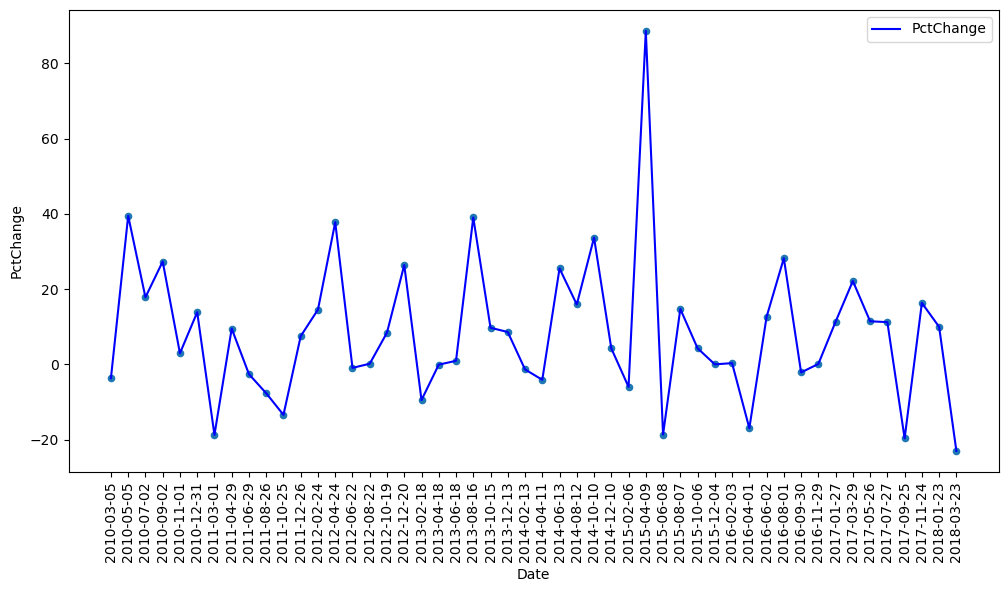

In [31]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)

In [74]:
nifty = pd.read_csv("nifty.csv")

In [75]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
nifty = nifty.loc[:, (nifty != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(nifty)
nifty = nifty.loc[:, (nifty != 0).sum() >= threshold]
nifty = nifty.iloc[::-1]

In [76]:
# rename Close to Nifty
nifty.rename(columns={'Close': 'nifty'}, inplace=True)

In [77]:
# reverse the index
nifty = nifty.iloc[::-1]

In [33]:
# from collections import defaultdict
# def BackTest_Nifty(nData,startDate, duration):
#     window = 2  # month
#     print(type(startDate))
#     start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
#     end = start + datetime.timedelta(days=30*window)

#     end_stop_date = start + datetime.timedelta(days=duration)
#     x = defaultdict(dict)
#     c = 1
#     print(type(end))
#     print(type(end_stop_date))

#     while end < end_stop_date:
#         end = start + datetime.timedelta(days=30*window)
#         temp = nData.loc[start:end, :]
#         # print(temp["Close"])
#         print(temp)
#         x["nifty"][c] = {
#             "date_start": str(temp["Close"].iloc[0:].index[0]),
#             "date_end": str(temp["Close"].iloc[-1:].index[0]),
#             "st_price": temp["Close"].iloc[0],
#             "en_price": temp["Close"].iloc[-1]
#         }
#         start = end
#         c += 1
#     return x, c-1

In [80]:
r, weights = DiscreteAllocation(nifty, {"nifty": 100.0}, 100000, "2010-01-05")

18
4997.8017578125


In [97]:
weights

{'nifty': {'price': 5277.89990234375,
  'units': 18,
  'allocated': 100000.0,
  'reminder': 4997.8017578125}}

In [81]:
win, total_ = BackTest(nifty, "2010-01-05", 3000, weights)

In [83]:
win, total_

(defaultdict(dict,
             {'nifty': {1: {'date_start': '2010-01-05',
                'date_end': '2010-03-05',
                'date_start_price': 5277.89990234375,
                'date_end_price': 5088.7001953125,
                'st_price': 95002.1982421875,
                'en_price': 91596.603515625,
                'pct_change': -3.5847536052594013},
               2: {'date_start': '2010-03-08',
                'date_end': '2010-05-05',
                'date_start_price': 5124.0,
                'date_end_price': 5124.89990234375,
                'st_price': 92232.0,
                'en_price': 92248.1982421875,
                'pct_change': 0.017562496950624513},
               3: {'date_start': '2010-05-05',
                'date_end': '2010-07-02',
                'date_start_price': 5124.89990234375,
                'date_end_price': 5237.10009765625,
                'st_price': 92248.1982421875,
                'en_price': 94267.8017578125,
                'pct_change

In [84]:
niftyPercentChange, niftyendDates = PercentChange(win, total_)

In [85]:
nifty_portfolio = pd.DataFrame({
    'Date': niftyendDates,
    'niftyPctChange': niftyPercentChange
})

In [86]:
print(nifty_portfolio)

          Date  niftyPctChange
0   2010-03-05       -3.584754
1   2010-05-05        0.017562
2   2010-07-02        2.189315
3   2010-09-02        4.779503
4   2010-11-01       11.508980
5   2010-12-31        0.277075
6   2011-03-01       -9.979627
7   2011-04-29        4.114231
8   2011-06-29       -1.768888
9   2011-08-26      -15.224676
10  2011-10-25        5.528905
11  2011-12-23      -12.063726
12  2012-02-24       14.289018
13  2012-04-24       -3.806198
14  2012-06-22       -1.466690
15  2012-08-22        5.830315
16  2012-10-19        5.013993
17  2012-12-20        3.485128
18  2013-02-18       -0.307615
19  2013-04-18       -1.951444
20  2013-06-18       -0.356503
21  2013-08-16       -5.259220
22  2013-10-15       12.453018
23  2013-12-13        2.027007
24  2014-02-13       -2.495655
25  2014-04-11       12.917627
26  2014-06-13       12.015268
27  2014-08-12        2.452231
28  2014-10-10        1.719937
29  2014-12-10        5.979014
30  2015-02-06        3.655005
31  2015

<Axes: xlabel='Date', ylabel='niftyPctChange'>

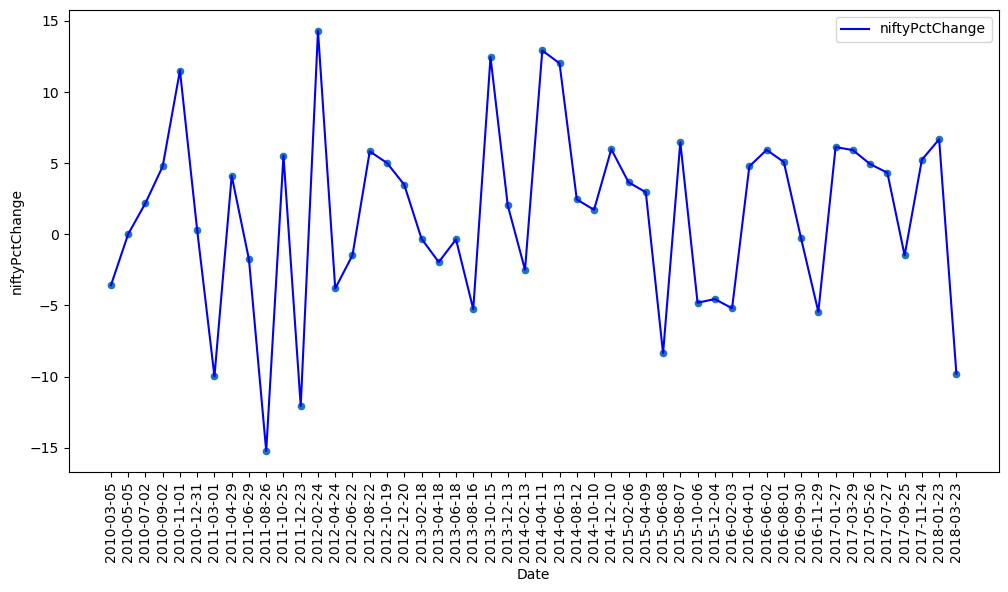

In [87]:
# plt.plot(data=portfolio)
nax = nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="scatter",
                    figsize=[12, 6], style='b', rot=90)
nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="line",
                     ax=nax, style='b', rot=90)

In [94]:
dats = pd.concat([portfolio, nifty_portfolio["niftyPctChange"]], axis=1)

In [95]:
dats

,Date,PctChange,niftyPctChange
0,2010-03-05,-3.651906,-3.584754
1,2010-05-05,39.472623,0.017562
2,2010-07-02,17.830125,2.189315
3,2010-09-02,27.329802,4.779503
4,2010-11-01,2.957902,11.508980
5,2010-12-31,13.867408,0.277075
6,2011-03-01,-18.712604,-9.979627
7,2011-04-29,9.510551,4.114231
8,2011-06-29,-2.588875,-1.768888
9,2011-08-26,-7.654876,-15.224676


<Axes: xlabel='Date'>

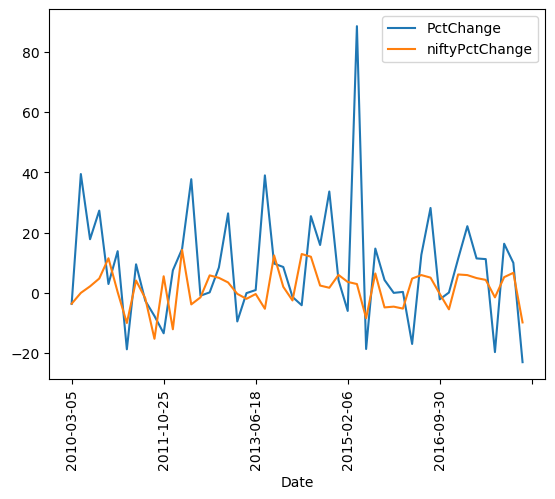

In [96]:
x = dats.plot(x="Date", y="PctChange", kind="line", rot=90)
dats.plot(x="Date", y="niftyPctChange",kind="line", ax=x, rot=90)